<a href="https://colab.research.google.com/github/SystemCreators-Projects/IoT_for_beginners/blob/main/2025_Raspberry_Pi_by_SCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前提

本資料は、群馬大学 青木先生の資料(以下)について、Raspberry Pi のセットアップ部分をまとめたもの\
(https://github.com/YukiAoki-GU/IoT_for_beginners/blob/main/2023_Raspberry_Pi.ipynb) \
作業OSはWindowsで行う

---
# Raspberry Piについて
ラズパイってどういうものかを簡単に説明します。

Raspberry Pi(ラズパイ)は立派なパソコンです。皆さんが持っているパソコンとラズパイの違いは，とりあえず以下の2点だと思ってください。
- ラズパイのCPUはARMである

皆さんのパソコンのCPUはおそらくx64と呼ばれるものです。一方でラズパイのCPUはARMと呼ばれるもので，主にスマホやタブレットに使われているものになります。どちらでも人間が読むコードレベルでは同じものが動くため，あまり意識することはありませんが，コンピュータが読むアセンブラレベルでは異なってきます。そのため，コンパイルの方法が異なってきます。

- ラズパイにはGPIOが搭載されている

ラズパイにはセンサを制御するためのピン(汎用入出力ピン)が搭載されています。このピンにセンサを接続することで，様々なものを測定することができます。

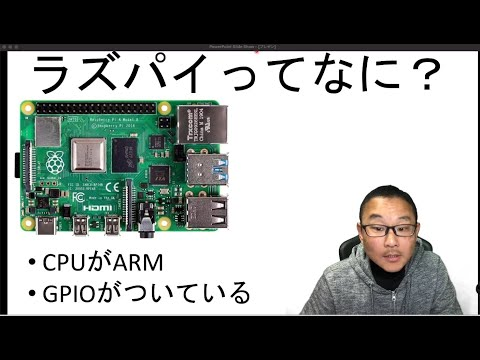

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2s5VijjuARY', width=400, height=225)

---
# Raspberry Pi OSイメージのインストール
ラズパイへのOSのインストール手順について説明します。




## 下準備
予め，以下の作業を行ってください。

- SSID(WiFiの名前)とWi-Fiに接続するためのパスワードを調べておく。
- PCにSSHクライアントのソフトを入れておく。WindowsにWSLが入っている場合，SSHクライアントは入っています。またMacにも最初から入っています。Linux環境が何もない場合，Windowsでは[PuTTY](https://www.chiark.greenend.org.uk/~sgtatham/putty/)を入れておけばOK。

## インストール
~ラズパイに適したLinuxである"Raspberry Pi OS"は[ここ](https://www.raspberrypi.com/software/)からダウンロードできます。
ここからイメージを直接ダウンロードしてSDカードに入れてもいいのですが，インストールをサポートしてくれるWindows用，macOS用のソフト(Raspberry Pi Imager)があるのでこれを使いましょう。~

最新のラズパイOSだと動画の通りにやるとエラーが発生することが分かったので、古いバージョンダウンロードして使用する。  
[これ](https://downloads.raspberrypi.org/raspios_oldstable_arm64/images/raspios_oldstable_arm64-2024-03-12/2024-03-12-raspios-bullseye-arm64.img.xz)をダウンロードしておく

(※)Raspberry Pi OSはDebianです。

次をクリックして[Windows用](https://downloads.raspberrypi.org/imager/imager_latest.exe)，[macOS用](https://downloads.raspberrypi.org/imager/imager_latest.dmg)のどちらかをダウンロードしてインストールしてください。


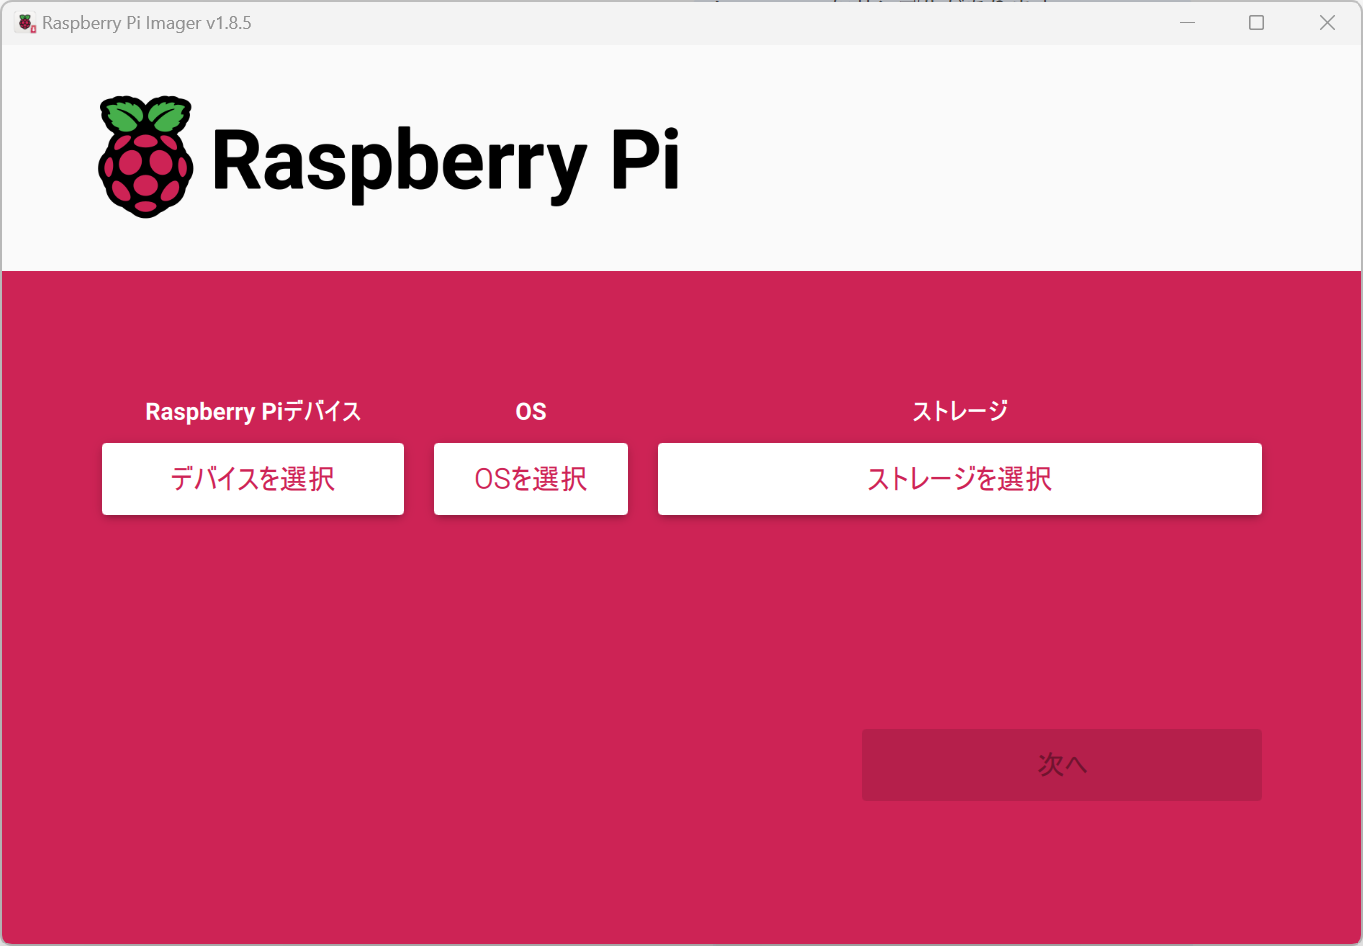

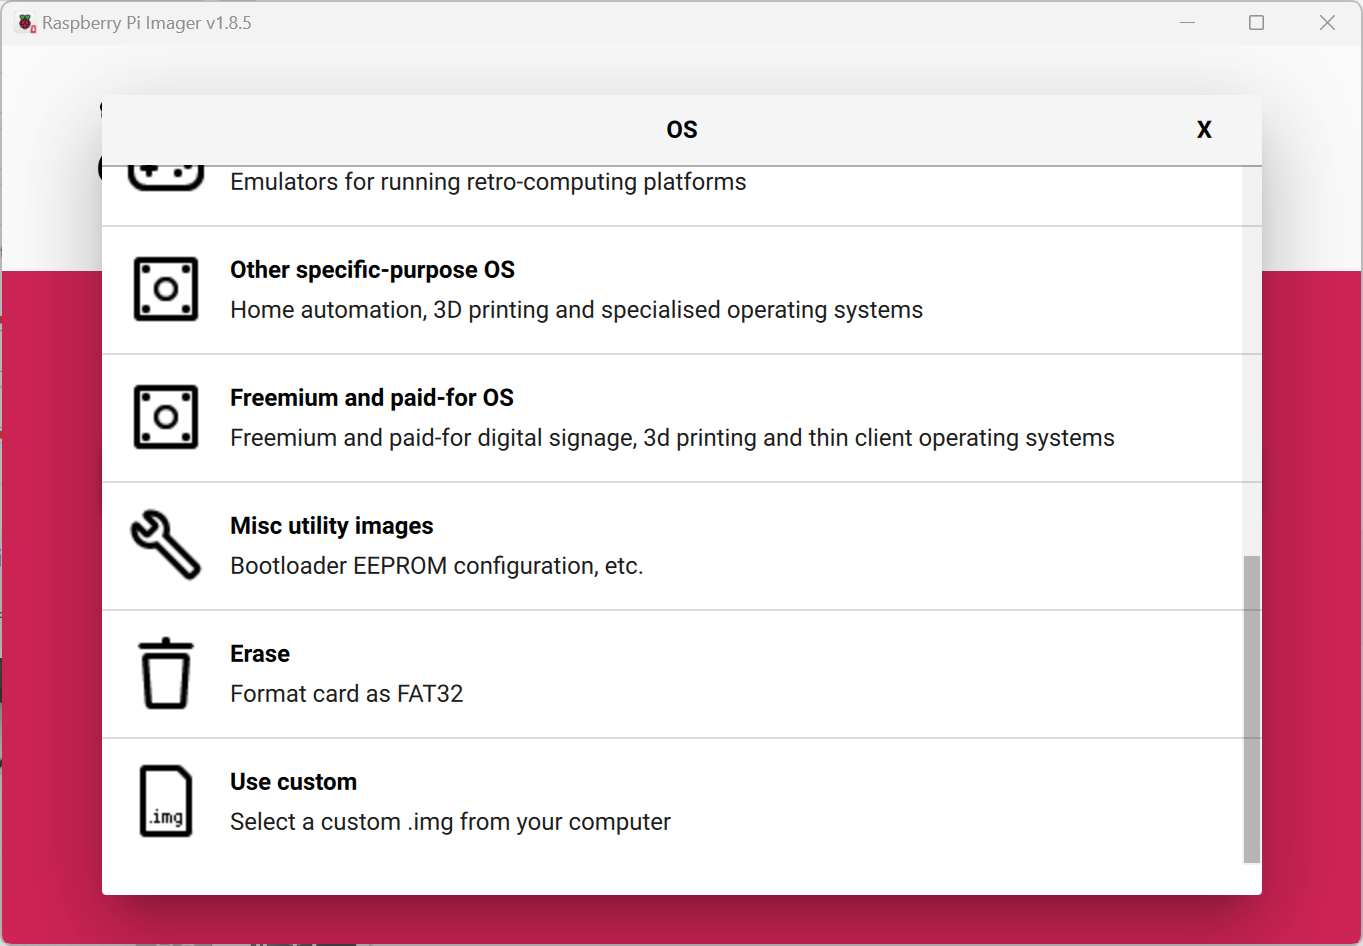

「デバイス」はRaspberry Pi Zero 2 W を選択する。  
「ストレージ」を選択し、SDカードを選択する。  
「OS」を選択し、Use custom から先ほどダウンロードした 2024-03-12-raspios-bullseye-arm64.img.xz ファイルを選択する。
  
次へを選択し、「設定を編集する」を選択する。

Raspberry Pi ImagerのAdvanced optionsで以下をセットして"保存"してください。
- ホスト名(名簿に記載)。使える文字はa〜zの英字，0〜9の数字，ハイフン(-)で大文字小文字の区別はなし。ピリオドは使えないことに注意！
- SSHを有効化する (パスワード認証を使う)
- ユーザー名(名簿に記載)とパスワード(名簿に記載)
- Wi-Fiを設定する でSSIDとパスワード (Wifiを使う国: JP)   
  (5GHz の Wifi には未対応)
- ロケール設定をする (Time zone: Asia/Tokyo, Keyboard layout: jp)



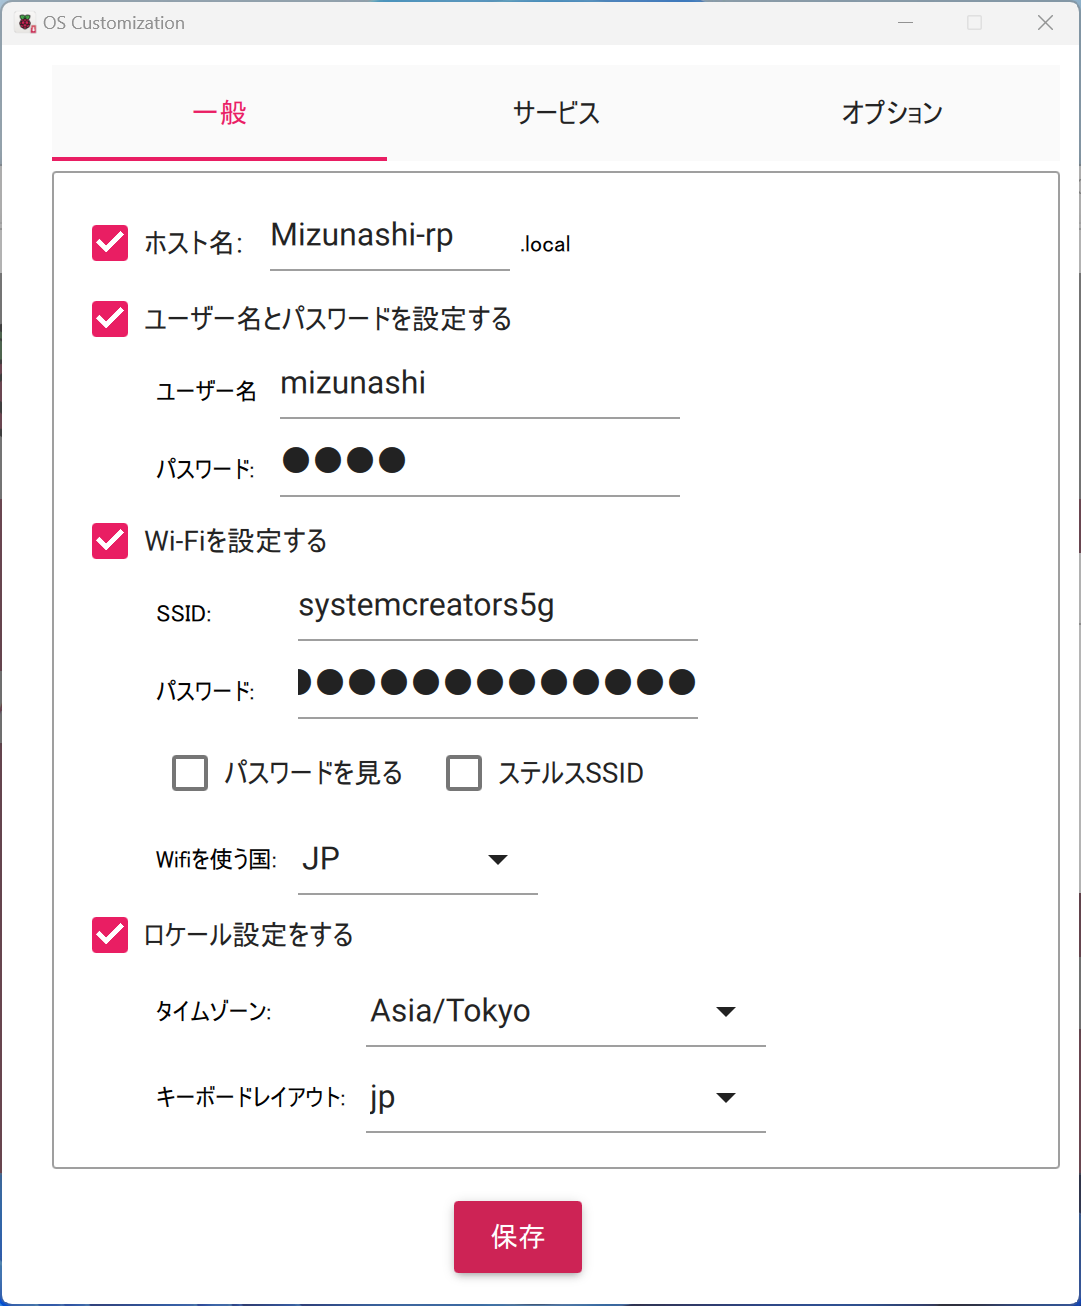

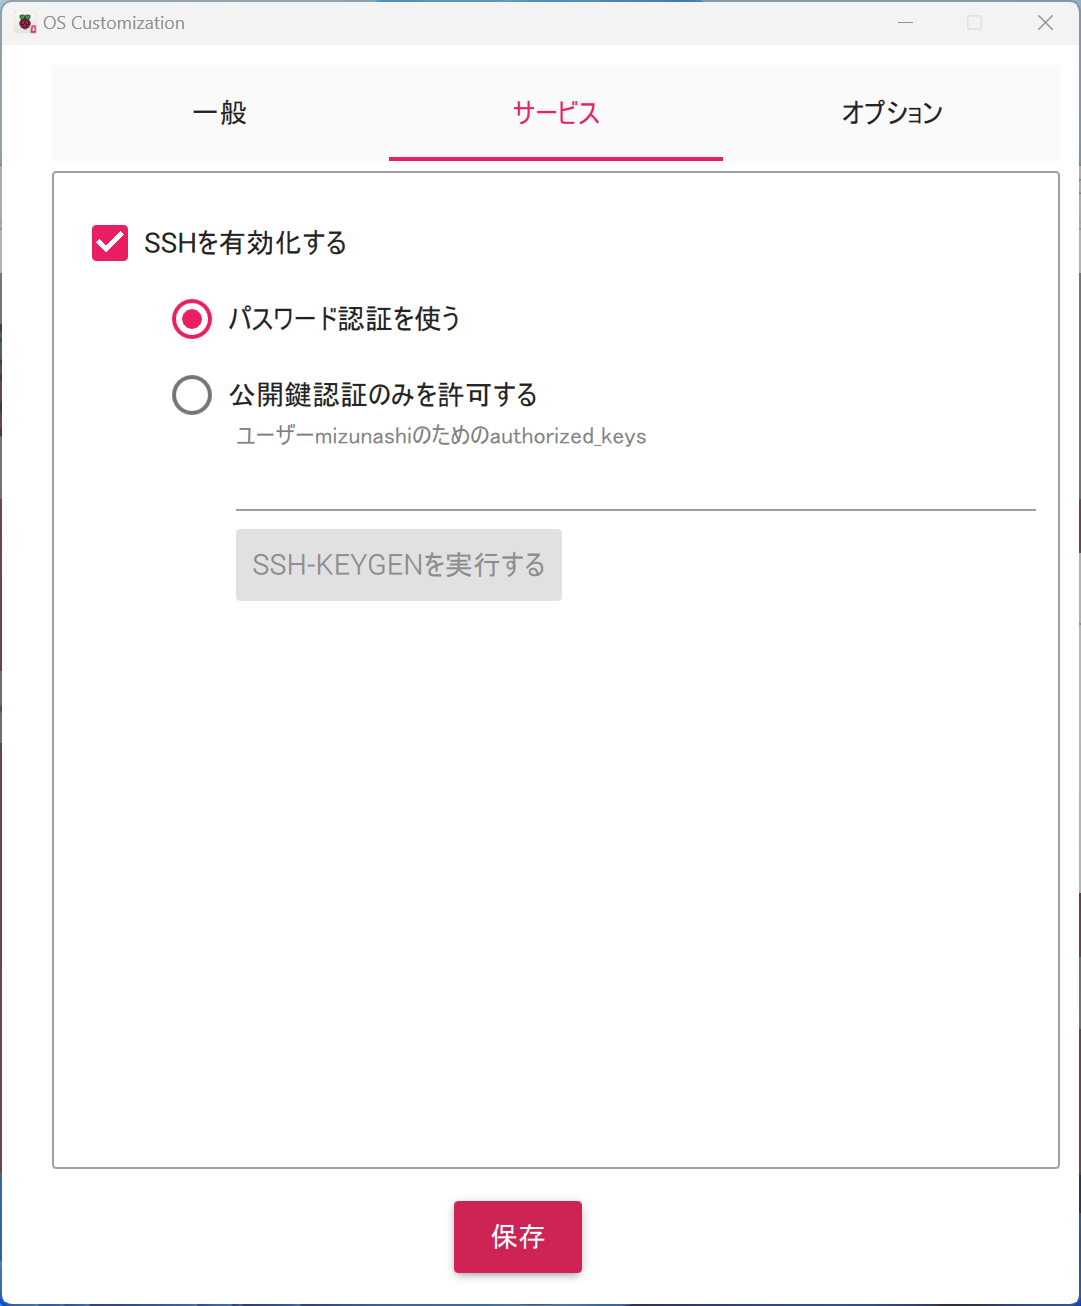

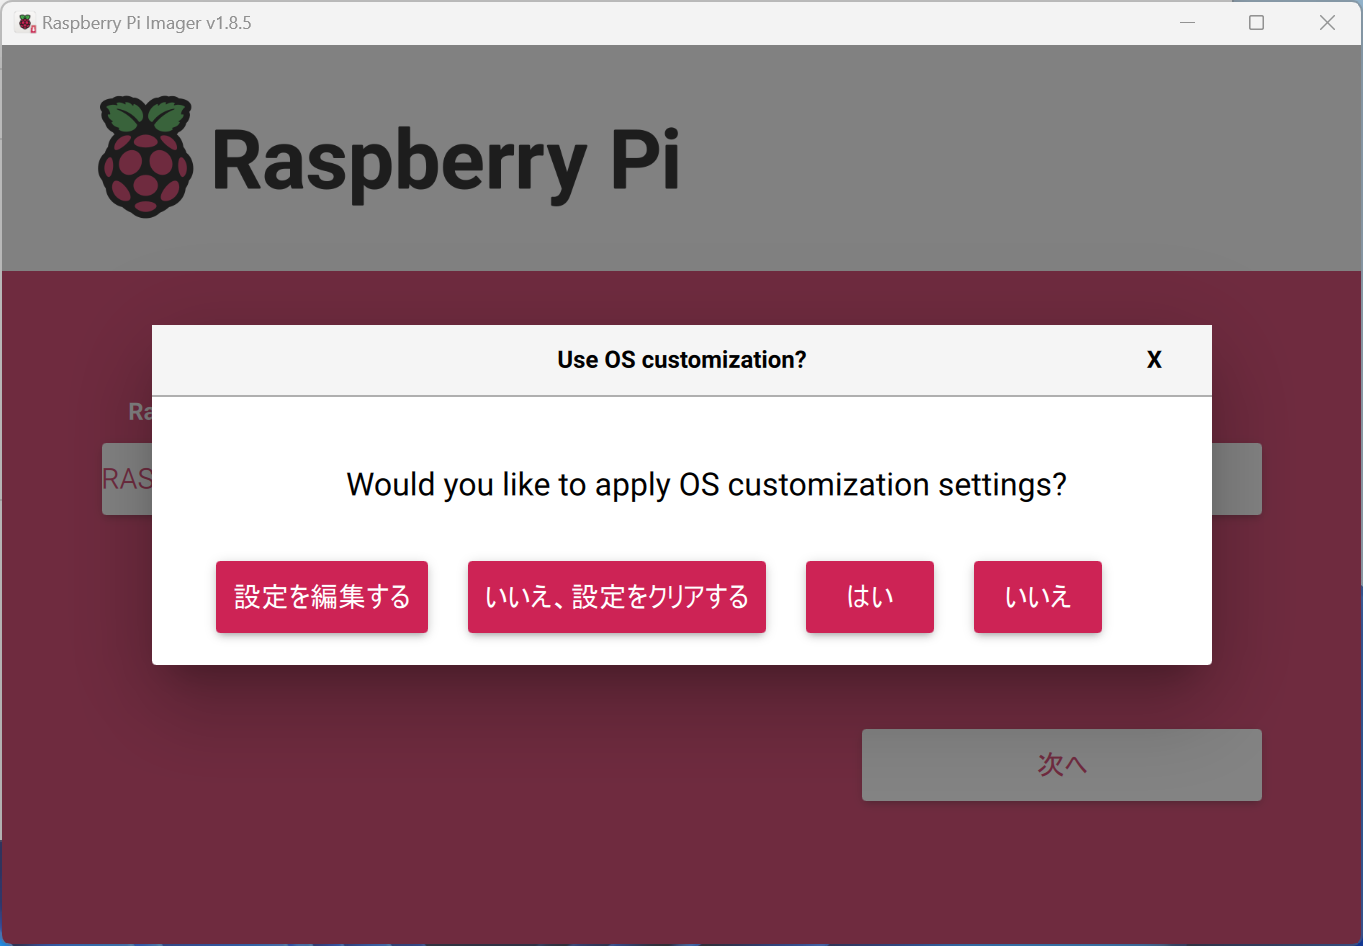

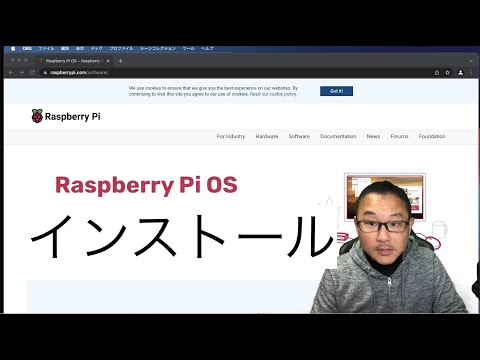

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('qucie7yMVyg', width=400, height=225)

---
## ラズパイの起動
ラズパイに電源アダプタを接続すると赤いLEDが点灯し，起動開始します。
ラズパイにディスプレイを繋いでいない場合，起動がどのようにされているかを見れません。
ディスプレイに繋いだ場合の起動の様子は以下の動画のようですので，参考にしてください。

Raspberry Pi に挿して起動後以下でipを確認します。
```
Ping [ホスト名(Mizunashi-rp)]
```
IPv6が有効の場合、IPv6で応答する場合があるので、その時はIPv4を指定します。
```
Ping -4 [ホスト名(Mizunashi-rp)]
```

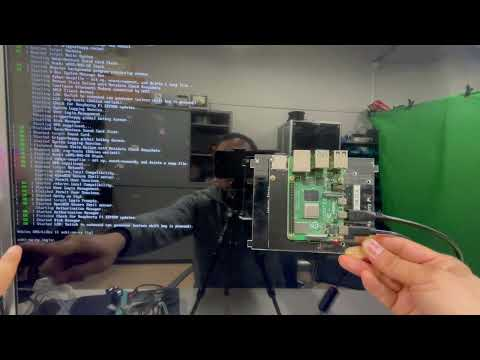

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('nMgXRshvKo4', width=400, height=225)

---
## ラズパイへの接続
ラズパイの起動が完了したら，同じWi-Fi上にあるSSHクライアントからラズパイに接続してみましょう。
以下のコマンドを入力し，その後パスワードを入力してください。
```
ssh [リモートユーザー名]@[ラズパイのホスト名].local
(ssh mizunashi@Mizunashi-rp.local)
```

以下を聞かれたら yes を入力します。
```
Are you sure you want to continue connecting (yes/no/[fingerprint])?
```

インストールしたOSがどのようなものかを確認してみましょう。
```
#OSのバージョンを確認するコマンド
cat /etc/os-release
```

```
#カーネルのバージョンを確認するコマンド
uname -r
```

```
# SHELLを確認するコマンド
echo $SHELL
```


```
(不要)
#SDカードを焼くときにオプションで設定した項目の変更
#カメラを認識できるようにしておく
sudo raspi-config
# 3 Interface options > I1 Legacy Camera > Yes > OK
```


設定変更後再起動されます。

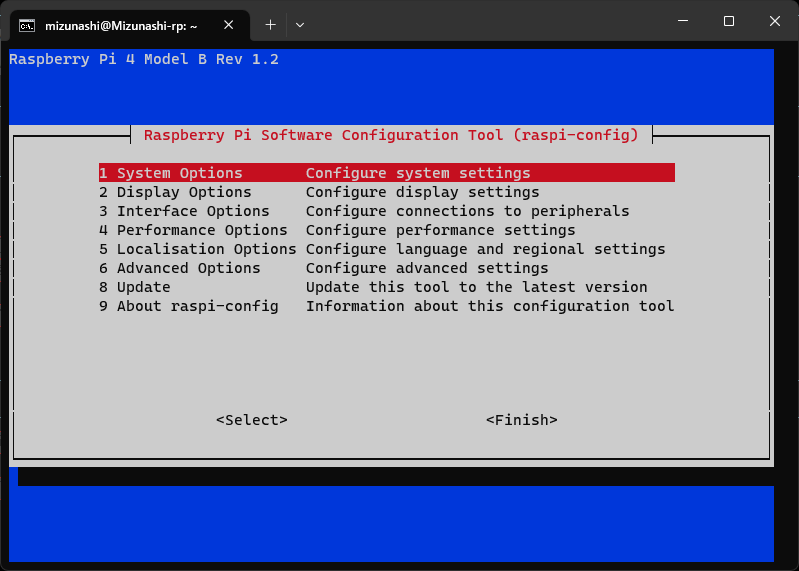

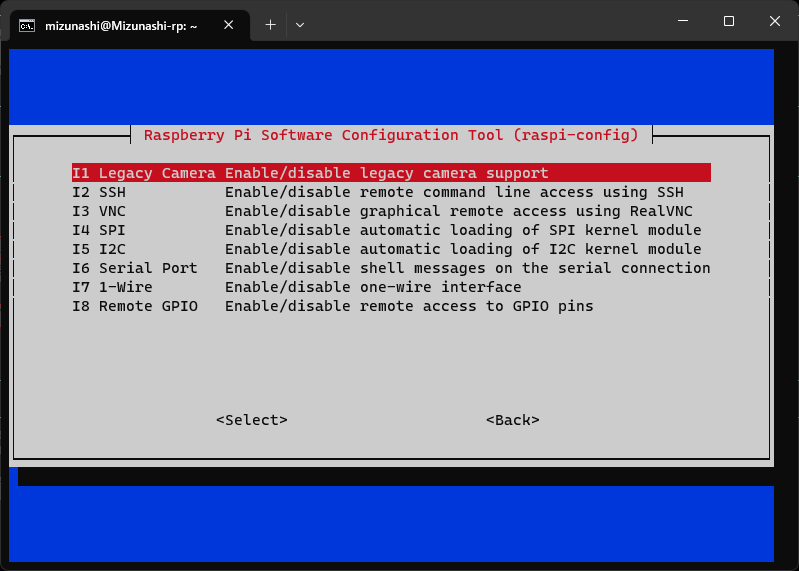

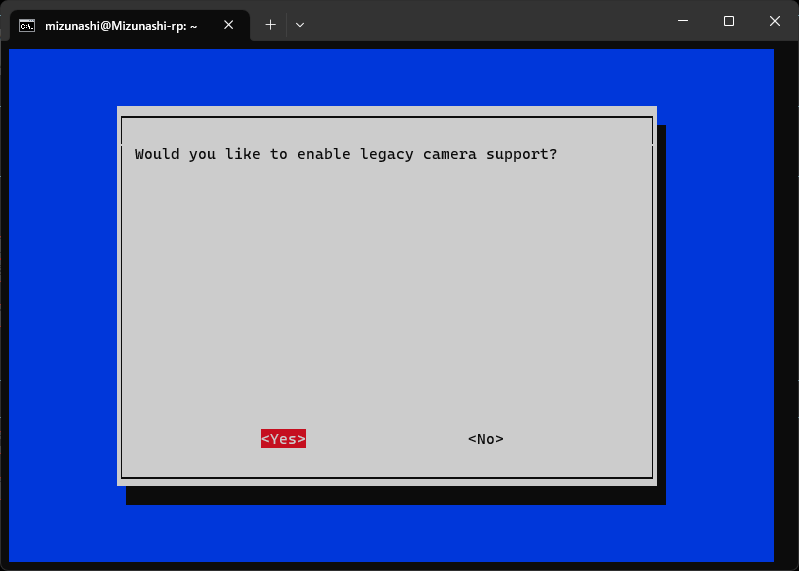

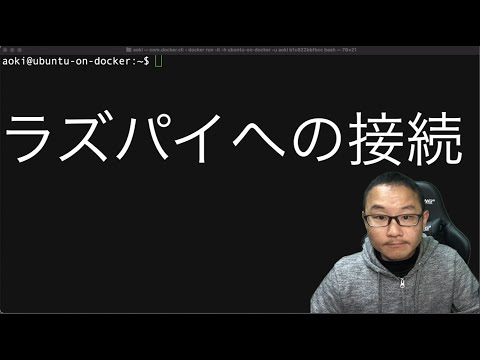

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('S_wHeTsFnBw', width=400, height=225)

### (補足)SSH接続とは
SSH接続がどういうものであるのか，イメージが分かるように以下の動画で解説します。

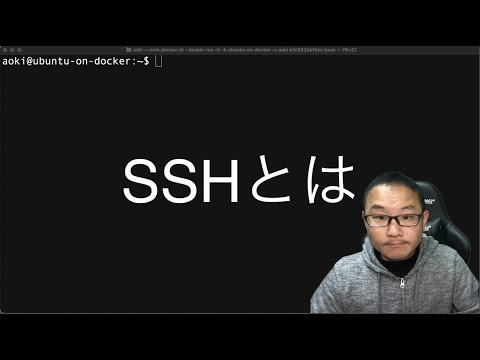

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('JOMevky4Egs', width=400, height=225)

### (補足)鍵認証によるSSH
SSHによる鍵認証を行ってみましょう。
鍵のペアを作るコマンドは以下です。\
Windows上で実行します。
```
ssh-keygen
```
Enter passphrase (empty for no passphrase): は今回は空白にします。



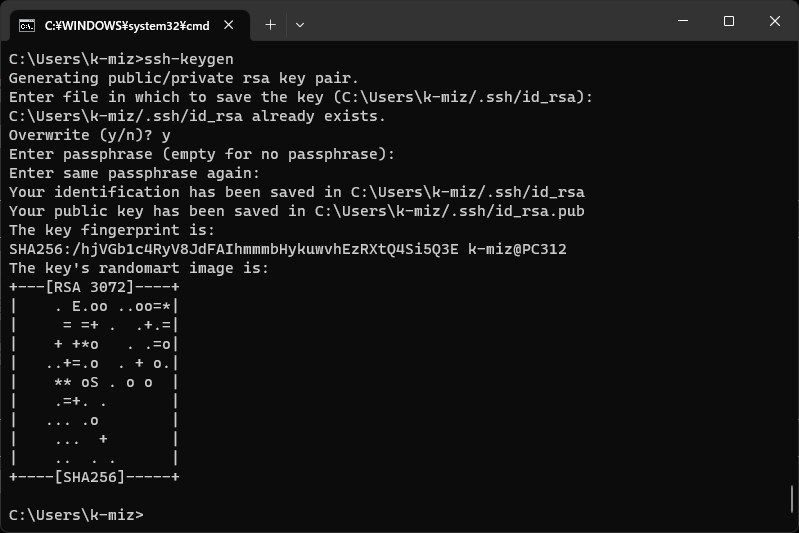

~/.ssh/ (C:\\Users\\[ユーザー名]\\.ssh) 以下に次の2つのファイルができました。

id_rsa #鍵

id_rsa.pub #鍵穴

次に，以下のコマンドで鍵穴をラズパイに取り付けましょう。\
Windows上で以下を実行します。
```
scp .ssh/id_rsa.pub [ユーザー名]@[ホスト名].local:/home/[ユーザー名]/

#ログイン後
mkdir .ssh
mv id_ras.pub .ssh/authorized_keys
```
設定後パスワードなしてログインできるようになったことを確認します。



省略コマンドはWindowsでは設定が手間なので省略\
~~これで鍵認証ができるようになりました。
ついでに，sshコマンドの省略形'rp'を作ってしまいましょう。
以下でrpというコマンドの登録をします。~~


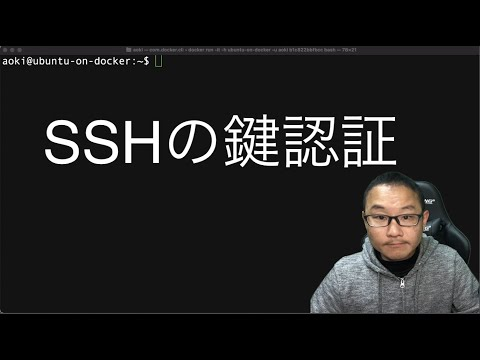

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ga8keeRD_ig', width=400, height=225)

# 基本設定の更新

ネットワークやスワップ領域の更新を行います。

まずは、ネットワーク情報ファイルをラズパイ内に入れます。  
ネットワーク情報ファイル(secret.env)は社内のローカルサーバーの個人フォルダ内においてあります。（セキュリティのため）

参考に内容は以下のように追加するネットワーク設定を列挙してあります。
```
# Wi-Fiネットワーク設定

# ネットワーク1
SSID_1="NetworkName1"
PASSWORD_1="Password1"
PRIORITY_1=10

# ネットワーク2
SSID_2="NetworkName2"
PASSWORD_2="Password2"
PRIORITY_2=20

# ネットワーク3
SSID_3="NetworkName3"
PASSWORD_3="Password3"
PRIORITY_3=30
```

PowerShellを開き、設定ファイルをラズパイに送信します。  
（secret.env ファイルのパスに気を付けること）
```
# tmp フォルダにファイルを送る
scp ./secret.env mizunashi@Mizunashi-rp.local:/tmp/
```

ラズパイのコマンドラインに戻り、設定ファイルを実行します。  
ネットワークの切り替えと再起動が起こるので通信が切れます。
```
bash <(curl -sL https://raw.githubusercontent.com/SystemCreators-Projects/IoT_for_beginners/main/install/iot_rp_setup.sh)
```

---
## Jupyter labのインストール

```
#Jupyter labのインストール
bash <(curl -sL https://raw.githubusercontent.com/YukiAoki-GU/IoT_for_beginners/main/install/jupyer_install.sh)
```

ブラウザのURL欄に

ラズパイのホスト名.local:8080

でJupyter labが立ち上がることを確認しましょう。ログインパスワードは

iot-school

です。

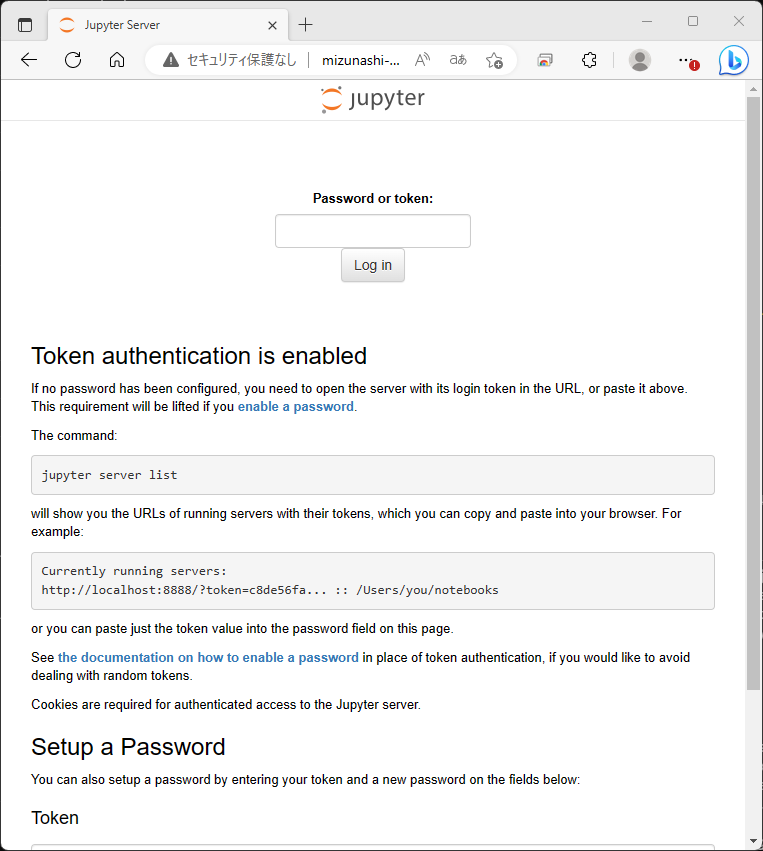

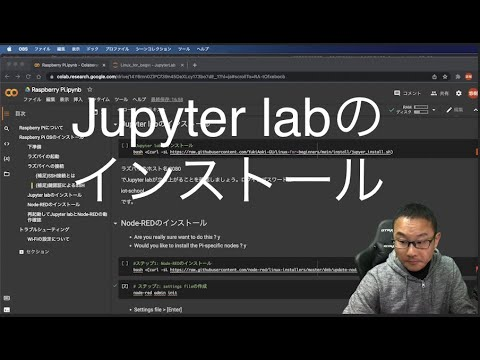

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('4EfQ5E78fjk', width=400, height=225)

---
## Node-REDのインストール

```
#ステップ1: Node-REDのインストール
bash <(curl -sL https://raw.githubusercontent.com/node-red/linux-installers/master/deb/update-nodejs-and-nodered)
```
- Are you really sure want to do this ? y
- Would you like to install the Pi-specific nodes ? y
- Would you like to customise the settings now (y/N) ? y
- Settings file > [Enter]
- Do you want to setup user security? > Yes
- Username > 名簿を参照
- Password > 名簿を参照 (8文字以上)
- User permissions > full access
- Add another user? > No
- Do you want to enable the Projects feature? > No
- Enter a name for your flows file > [Enter]
- Provide a passphrase to encrypt your credentials file > [Enter]
- Select a theme for the editor. > default
- Select the text editor component to use in the Node-RED Editor > monaco(default)
- Allow Function nodes to load external modules? > Yes

```
# ステップ2: 追加のインストール
bash <(curl -sL https://raw.githubusercontent.com/YukiAoki-GU/IoT_for_beginners/main/install/nodered_add_install.sh)
```
ブラウザのURL欄に

ラズパイのホスト名:1880

でNode-REDが立ち上がることを確認しましょう。

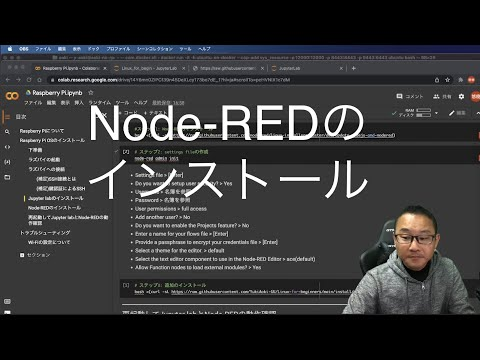

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y3wYb6u6PZk', width=400, height=225)

---
## 再起動してJupyter labとNode-REDの動作確認
一応，再起動して確認してみましょう！
```
# 再起動
sudo reboot
```

---
# カメラの初期化

#不要

~Node-REDにおいて、最初のカメラの初期化が失敗するようです。~\
~usbcameraのFileModeをBufferに設定し、~\
~以下のようにコードを組んでデプロイして実行するとエラーが発生します。~

~一度FileModeをFileModeに設定し、デプロイして実行して、カメラを動作させます。~\
~その後、FileModeをBufferに戻してカメラ撮影できることを確認します。~

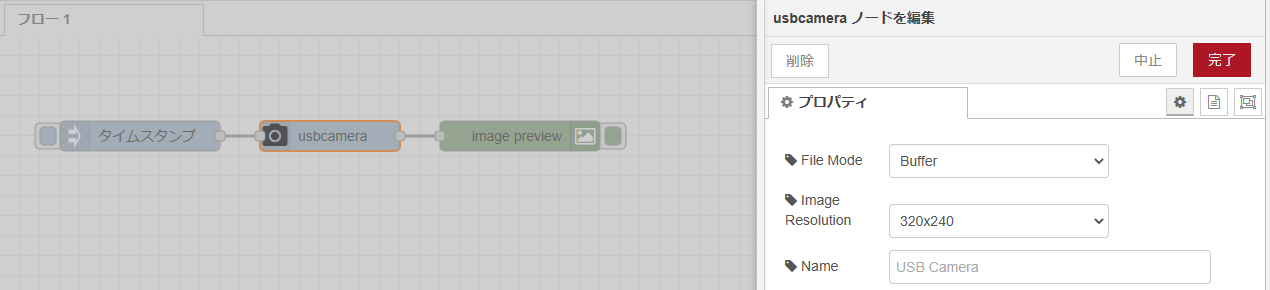

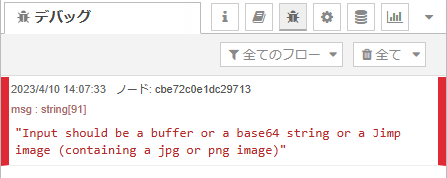

保存に成功\
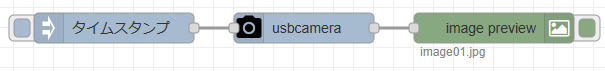

---
#トラブルシューティング


## Wi-Fiの設定について
Wi-Fiの設定を一度間違えてしまうと，ラズパイが迷子になってしまうことがあります。SD書き込み時に行ったオプション設定やsudo raspi-configのコマンドで行ったW-Fiの設定ファイルは/etc/wpa_supplicant/wpa_supplicant.confです。しかし，SDカードを別のPCに読み込ませてもこのファイルにはアクセスできません。SDカードの直下に以下の2つの設定ファイルを置くことで，Wi-Fi接続が可能になります。
- wpa_supplicant.conf
- ssh.txt

ここでwpa_supplicant.confの内容はラズパイOS内の/etc/wpa_supplicant/wpa_supplicant.confと同じもので，Wi-FiのSSIDとパスワードが書かれてあります。またssh.txtは空のファイルですが，この名前のファイルを置くことでssh接続が許可されます。

この2つのファイルは単なるテキストファイルですが[こちら](https://mascii.github.io/wpa-supplicant-conf-tool/)からも簡単に作ることができます。

---
# Wi-Fi設定の追加について

```
sudo nmtui
```

で開いた設定画面から wifi 設定を追加できる


// 以下不要 \
Wi-Fi設定は以下から確認できます。
```
sudo vi /etc/wpa_supplicant/wpa_supplicant.conf
```

```
sudo raspi-config
```
で設定画面を開き、system options -> wireless LAN からWi-Fi情報を追加します
